In [1]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

In [2]:
W=np.linspace(0,70,71)#W=Conjunto de trabajadores
X=5#X=Conjunto de tareas
Qt=[0,1,2,3,4,5,6,7,8,9]
bx=np.random.randint(1000, size=(70, 5))#bx=presupuesto asignado a la tarea x una vez completada por el trabajador w
Aqt=np.random.rand(70,5)#conseguir que todos los trabajadores intenten la tarea de control de calidad qt

In [3]:
gmm = GaussianMixture(n_components=10,covariance_type="spherical",max_iter=40000)
gmm.fit(Aqt)

GaussianMixture(covariance_type='spherical', max_iter=40000, n_components=10)

In [4]:
gmm.predict_proba(Aqt)#probabilidades

array([[5.12373403e-08, 6.48305406e-03, 9.88291339e-01, 4.85105760e-03,
        9.13547685e-11, 1.42394444e-04, 8.72152230e-13, 2.32103239e-04,
        3.00837984e-20, 8.03423053e-11],
       [5.07770563e-06, 3.38885461e-02, 9.33068690e-01, 3.41422966e-03,
        1.29839666e-09, 2.84889494e-02, 6.51179123e-18, 9.96318038e-04,
        1.28039917e-04, 1.01479276e-05],
       [5.39037411e-03, 7.44337979e-01, 1.04400525e-07, 1.47443568e-07,
        7.48831189e-13, 5.61617397e-10, 2.04066623e-09, 2.50271375e-01,
        5.01668699e-22, 1.67091700e-08],
       [5.58685897e-03, 6.05321849e-03, 2.52220480e-02, 9.47923784e-01,
        1.24411961e-20, 1.14086971e-06, 1.30930888e-23, 1.96577724e-03,
        2.82855490e-09, 1.32471700e-02],
       [9.51799461e-11, 6.23999153e-04, 2.15212685e-02, 6.84402317e-08,
        1.92351163e-12, 9.77853923e-01, 1.68281936e-36, 7.05445469e-07,
        3.14769833e-18, 3.56499594e-08],
       [1.21012886e-11, 1.63601409e-02, 4.00820845e-02, 2.15683074e-08,
   

In [5]:
Clasificacion=np.array([i.argmax() for i in gmm.predict_proba(Aqt)])

In [6]:
Clasificacion#Calidad de los trabajadores 

array([2, 2, 1, 3, 5, 5, 6, 7, 0, 1, 4, 2, 7, 0, 4, 8, 1, 2, 7, 2, 3, 1,
       7, 8, 9, 0, 1, 9, 5, 0, 9, 0, 3, 6, 4, 8, 4, 1, 1, 3, 2, 6, 5, 7,
       3, 7, 3, 9, 5, 4, 5, 2, 1, 9, 1, 5, 2, 5, 7, 8, 9, 5, 1, 2, 1, 0,
       3, 2, 7, 1], dtype=int64)

# Asumiremos que todos los trabajadores aceptan sus pagos para no ejecutar el algoritmo de correccion de valores 

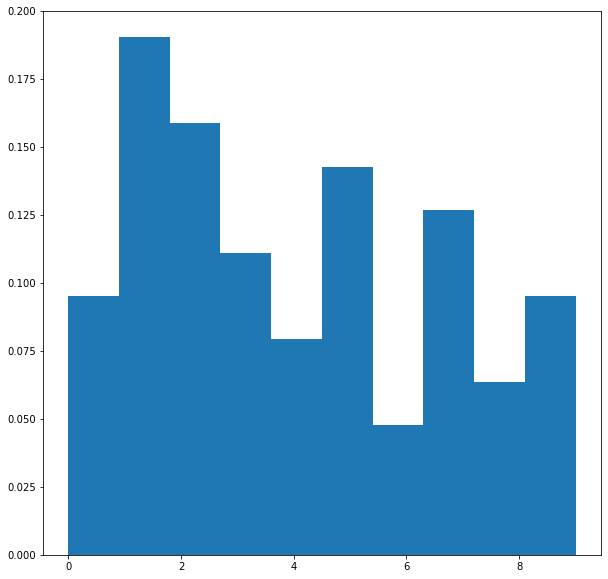

In [7]:
plt.figure(figsize=(10,10))
plt.hist(Clasificacion,bins=10,density=True)
plt.show()

In [8]:
def prior(x):
    if(0<=x<=9):
        return 1
    else:
        return 0

In [9]:
def likelihood(d,x):
    k=0
    for i in range(len(d)):
        if(d[i]!=0):
            k=k+np.log(d[i])
    return k

In [10]:
def ParameterEstimation(n,d):
    x1 = np.zeros(n)
    acept = 0    
    x1[0]=4.5
    for i in range(1, n):
        actual=x1[i-1]
        propuesto=np.random.normal(actual,0.1)
        #propuesto=multivariate_normal(actual,desv).rvs()
        lik1=likelihood(d,propuesto)
        lik2=likelihood(d,actual)
        pri1=prior(propuesto)
        pri2=prior(actual)
                
        
        #acep=(lik1*pri1)/(lik2*pri2)  
        acep=(lik1*pri1)-(lik2*pri2) 
        if np.log(np.random.rand()) < min(1, acep):
            x1[i] = propuesto
            acept += 1
        else:
            x1[i] = actual
    return x1,acept/n*100


In [11]:
ParameterEstimation(100,Clasificacion)

(array([4.5       , 4.6791515 , 4.57427438, 4.69014478, 4.59821047,
        4.7086336 , 4.7199183 , 4.66245649, 4.75071557, 4.70511747,
        4.73303111, 4.70326699, 4.82828856, 5.01252446, 5.00340875,
        5.02158462, 5.01716488, 5.01124399, 4.95018445, 4.97808999,
        5.00372099, 4.98947251, 4.8950148 , 4.99350994, 4.88746505,
        4.91948631, 4.88825563, 4.81244663, 4.67827654, 4.50915589,
        4.49419561, 4.54161403, 4.52591496, 4.74213609, 4.7368099 ,
        4.74298797, 4.64298624, 4.78262677, 4.69323696, 4.72868185,
        4.82470785, 4.58549685, 4.49297693, 4.60883111, 4.5522522 ,
        4.55121441, 4.59282996, 4.55917044, 4.49856463, 4.47539924,
        4.51235202, 4.52508094, 4.43672246, 4.36298948, 4.35931568,
        4.32083523, 4.3222607 , 4.36350156, 4.34857728, 4.27771726,
        4.39850074, 4.51362709, 4.46085283, 4.29073266, 4.25296625,
        4.16930222, 4.20562371, 4.25925807, 4.22677894, 4.29221685,
        4.41900629, 4.38200449, 4.25411879, 4.27

In [12]:
#W=Conjunto de trabajadores
#X=Conjunto de tareas
#Qt=Conjunto de calidad de control de tareas
#bx=presupuesto asignado a la tarea x una vez completada por el trabajador w

In [13]:
#tarea de calidad qt en Qt
#conseguir que todos los trabajadores intenten la tarea de control de calidad
#aplicar el Modelo de Mezcla Gaussiano para medir la calidad de los trabajadores
#